In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
df = pd.read_csv('report.csv')
df = df.loc[df['result'].isin(['Verified', 'Timeout'])]
df = df.loc[df['size'] > 5]
df.loc[df['time'] > 180, 'time'] = 180
# df.loc[df['result'] == 'Parsing Error', 'time'] = 180
# df.loc[df['result'] == 'Unsupported', 'time'] = 180
df

,file,result,msg,size,time
3,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,13,0.261
6,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,70,0.187
8,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,23,0.209
10,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,69,0.297
11,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,48,0.131
...,...,...,...,...,...
90518,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Timeout,NaN,7,180.000
90519,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,87,0.161
90520,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,138,1.009
90521,/home/wutianxing/Fuzz/Tue-Apr-15-03:39:26-PM-C...,Verified,NaN,40,61.663


/var/folders/14/t5qc18ss4p13n5pw7nybrdzr0000gn/T/ipykernel_92109/4179756568.py:40: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.ecdfplot(data=df1, x="time", ax=ax2, stat='percent', log_scale=(True, False), palette='mako')


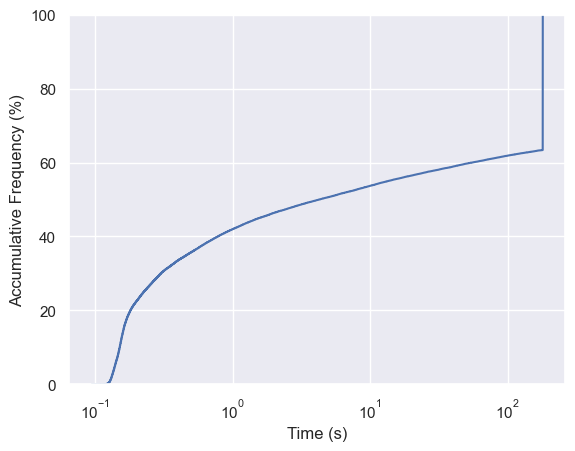

In [3]:

df1 = df[['time', 'size']]
df1 = df1.loc[df1['time'] > 0]
# df1 = df1.loc[df1['size'] > 5]

# arr = np.asarray(df1['size'])
# length = len(arr)
# arr.sort()
# split1 = arr[length//3]
# split2 = arr[2*length//3]

df1['size range'] = 'overall'

# df2 = df1.loc[df1['size'] < split1].copy()
# df2['size range'] = f'< {split1}'
# df1 = pd.concat([df1, df2])

# df2 = df1.loc[(df1['size'] >= split1) & (df1['size'] <= split2)].copy()
# df2['size range'] = f'{split1} ~ {split2}'
# df1 = pd.concat([df1, df2])

# df2 = df1.loc[df1['size'] > split2].copy()
# df2['size range'] = f'> {split2}'
# df1 = pd.concat([df1, df2])

sns.set_theme(style='darkgrid')

fig, ax = plt.subplots(1,1)

# ax.set_yticks(np.arange(0,21,4))
# ax.set_ylim(0,20)
# ax.set_ylabel('Frequencey (%)')
# ax.set_xlabel('Time (s)')
# sns.histplot(data=df1, x="time", ax=ax, stat='percent', bins=12, hue='size range', multiple="dodge", log_scale=(True, False), kde=True)

ax2 = ax
ax2.set_ylabel('Accumulative Frequency (%)')
ax2.set_ylim(0,100)
ax.set_xlabel('Time (s)')
# ax2.grid(False)
sns.ecdfplot(data=df1, x="time", ax=ax2, stat='percent', log_scale=(True, False), palette='mako')
# ax2.legend_.remove()

plt.savefig('analysis.png', dpi=300)


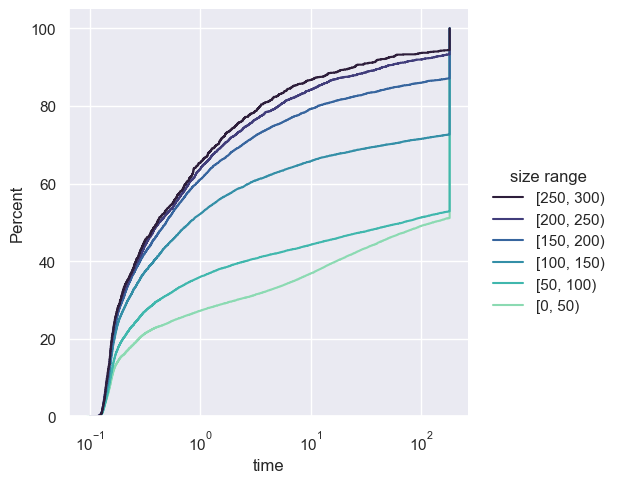

In [4]:
df3 = df[['time', 'size']]
df3 = df3.loc[df3['time'] > 0]

df0 = pd.DataFrame()
splits = np.arange(0,350,50)

pre = None
for split in splits:
    if pre == None:
        pre = split
    else:
        df2 = df3.loc[(df3['size'] >= pre) & (df3['size'] < split)].copy()
        df2['size range'] = f'[{pre}, {split})'
        df0 = pd.concat([df2, df0])
        pre = split
        # df2 = df3.loc[(df3['size'] < split)].copy()
        # df2['size range'] = f'[{pre}, {split})'
        # df0 = pd.concat([df2, df0])
        # pre = split

sns.displot(data=df0, x='time', hue='size range', kind='ecdf',log_scale=(True, False), palette='mako', stat = 'percent')
plt.savefig('time distribution.png', dpi=300)

<Axes: xlabel='time', ylabel='Percent'>

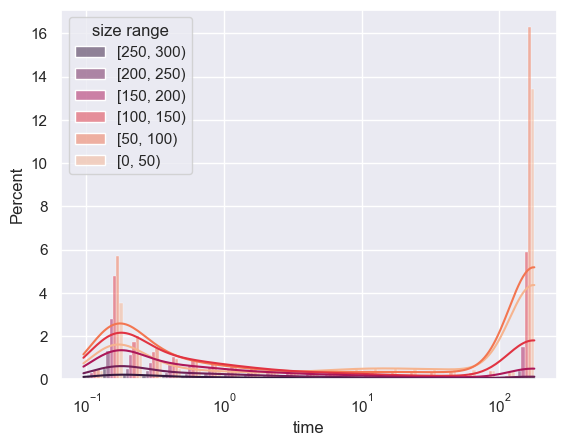

In [5]:
sns.histplot(data=df0, x='time', hue='size range', stat='percent',log_scale=(True, False), multiple='dodge', palette='rocket', kde = True)

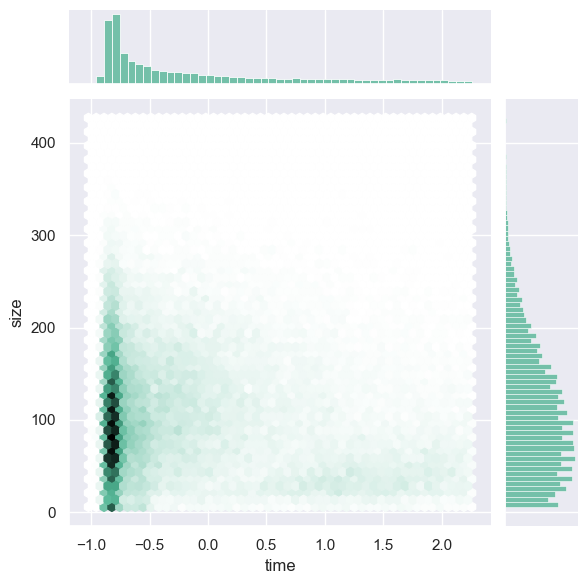

In [6]:
df2 = df.loc[df['time'] < 180].copy()
df2['time'] = df2['time'].apply(lambda x: math.log10(x))
sns.jointplot(data=df2, x='time', y='size', kind="hex", color="#4CB391")